<a href="https://colab.research.google.com/github/Nareekan789/python_dataviz2023/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

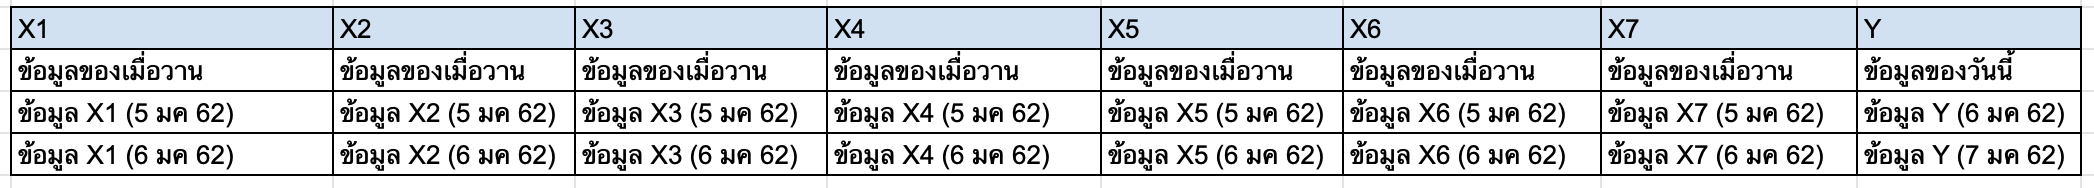

In [5]:
import numpy as np

In [163]:
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#ขอนแก่น

##อุณหภูมิต่ำสุด

In [135]:
LowTemp_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)

In [136]:
#เปลี่ยนชื่อคอลลัม
LowTemp_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
LowTemp_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LowTemp_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
LowTemp_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

In [137]:
#แยกคอลลัมปี-เดือน
LowTemp_KhonKaen['ปี'] = LowTemp_KhonKaen['ปี-เดือน'].dt.year
LowTemp_KhonKaen['เดือน'] = LowTemp_KhonKaen['ปี-เดือน'].dt.month

In [138]:
LowTemp_KhonKaen

,ที่,สถานี,ปี-เดือน,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,เฉลี่ย,ปี,เดือน
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,21.1,21.3,23.4,22,22.2,-,-,20.1,2012,2
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,22.5,22.5,23.5,24.2,24.0,23.2,21.9,...,23.2,23.3,22.6,23.7,24.3,24.3,22.7,23.0,2012,10
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,20.4,21.0,21.2,22.0,23.3,24.1,23.5,...,23.2,23.4,24.3,23,23.8,23.8,-,23.3,2012,11
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,23.2,23.1,24.0,23.7,24.1,20.5,20.9,...,16.8,20.3,21.2,20.5,20.8,21.3,15.9,21.0,2012,12
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,14.7,17.8,18.1,17.7,17.7,18.2,17.5,...,21.7,22.0,22.7,19.3,18.1,20.5,21.7,18.8,2013,1
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,19.7,21.4,20.9,22.2,22.0,22.2,22.7,...,21.4,23.4,24.4,24.6,-,-,-,21.9,2013,2


In [139]:
LowTemp_KhonKaen=LowTemp_KhonKaen.drop(columns=['ปี-เดือน']) #ลบคอลลัมปี-เดือน
LowTemp_KhonKaen=LowTemp_KhonKaen.drop(columns=['เฉลี่ย']) #ลบคอลลัมเฉลี่ย

In [140]:
LowTemp_KhonKaen

,ที่,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,ปี,เดือน
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.8,23.0,22.1,22.8,23.1,21.7,22.0,23.2,...,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.7,20.4,20.5,20.9,20.6,22.2,23.8,22.4,...,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,19.3,18.9,15.4,15.6,16.3,20.2,20.8,21.0,...,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,17.7,19.6,20.4,20.7,16.8,16.9,16.8,15.5,...,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,19.4,20.5,20.9,20.9,21.5,21.1,20.7,20.4,...,21.3,21.1,21.3,23.4,22,22.2,-,-,2012,2
5,3,381201-ขอนแก่น จ.ขอนแก่น,22.5,22.5,23.5,24.2,24.0,23.2,21.9,22.5,...,23.1,23.2,23.3,22.6,23.7,24.3,24.3,22.7,2012,10
6,4,381201-ขอนแก่น จ.ขอนแก่น,20.4,21.0,21.2,22.0,23.3,24.1,23.5,23.7,...,24.9,23.2,23.4,24.3,23,23.8,23.8,-,2012,11
7,5,381201-ขอนแก่น จ.ขอนแก่น,23.2,23.1,24.0,23.7,24.1,20.5,20.9,20.9,...,16.1,16.8,20.3,21.2,20.5,20.8,21.3,15.9,2012,12
8,6,381201-ขอนแก่น จ.ขอนแก่น,14.7,17.8,18.1,17.7,17.7,18.2,17.5,19.0,...,20.5,21.7,22.0,22.7,19.3,18.1,20.5,21.7,2013,1
9,7,381201-ขอนแก่น จ.ขอนแก่น,19.7,21.4,20.9,22.2,22.0,22.2,22.7,23.0,...,19,21.4,23.4,24.4,24.6,-,-,-,2013,2


In [141]:
LowTemp_KhonKaen1 = LowTemp_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index() #สลับวันที่จากคอลลัมเป็นแถว
#เปลี่ยนชื่อคอลลัม
LowTemp_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
LowTemp_KhonKaen1.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
LowTemp_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิต่ำสุด(เซลเซียส)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,24.8
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,23.0
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,22.1
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,22.8
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,23.1
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,18.2
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,-
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


##อุณหภูมิตุ้มแห้ง

In [142]:
DryTemp_KhonKaen = pd.read_excel("//content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
DryTemp_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,26.8,27.4,28.3,27.9,27.4,27.3,26.5,...,27.6,27.9,27.8,27.6,27.8,28.8,29,28.3,27.5,27.6
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,25.6,26.0,26.7,27.5,28.2,28.4,28.4,...,30.0,26.8,26.0,28.2,27.9,27.2,27.5,28,-,27.9
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,28.5,28.6,28.1,26.9,28.0,25.0,25.7,...,24.8,21.7,22.9,25.3,26.5,26.5,26.9,25.3,20.4,26.2
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,20.8,23.9,24.9,23.5,23.8,24.3,24.1,...,26.1,26.3,26.3,25.4,25.1,20.1,23.2,24.1,24.1,24.0
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,24.7,25.0,24.9,26.8,27.8,28.2,29.6,...,24.6,26.0,28.0,29.7,31.0,31.0,-,-,-,27.6


In [143]:
DryTemp_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DryTemp_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DryTemp_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DryTemp_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

In [144]:
DryTemp_KhonKaen['ปี'] =DryTemp_KhonKaen['ปี-เดือน'].dt.year
DryTemp_KhonKaen['เดือน'] = DryTemp_KhonKaen['ปี-เดือน'].dt.month

In [145]:
DryTemp_KhonKaen=DryTemp_KhonKaen.drop(columns=['ปี-เดือน'])
DryTemp_KhonKaen=DryTemp_KhonKaen.drop(columns=['เฉลี่ย'])

In [146]:
DryTemp_KhonKaen1 = DryTemp_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DryTemp_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DryTemp_KhonKaen1.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
DryTemp_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,27.6
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,25.6
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,25.6
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,25.8
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,24.3
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,25.1
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,25.9
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


##อุณหภูมิจุดน้ำค้าง

In [147]:
DewpoinTemp_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
DewpoinTemp_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,21.3,21.8,22.3,24.1,24.0,21.5,20.3,...,20.0,20.9,20.9,20.9,19.2,21.0,22.5,22.9,20.4,21.551613
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,17.7,19.0,19.3,20.2,20.4,20.9,21.3,...,21.6,21.8,22.6,22.6,22.5,21.7,22.3,22.4,-,20.880000
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,21.3,21.2,21.5,21.1,21.5,17.1,18.7,...,15.9,12.0,14.0,16.3,17.2,17.8,17,15.2,10.4,17.854839
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,12.8,14.6,15.6,14.7,15.3,15.8,15.8,...,16.8,17.2,17.1,18.9,19.5,18.6,18.8,18.3,18.5,15.874194
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,18.1,18.1,16.5,17.6,18.5,17.0,16.9,...,13.2,14.9,17.8,18.5,19.0,19.8,-,-,-,17.207143


In [148]:
DewpoinTemp_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DewpoinTemp_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DewpoinTemp_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DewpoinTemp_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

DewpoinTemp_KhonKaen['ปี'] =DewpoinTemp_KhonKaen['ปี-เดือน'].dt.year
DewpoinTemp_KhonKaen['เดือน'] = DewpoinTemp_KhonKaen['ปี-เดือน'].dt.month

DewpoinTemp_KhonKaen=DewpoinTemp_KhonKaen.drop(columns=['ปี-เดือน'])
DewpoinTemp_KhonKaen=DewpoinTemp_KhonKaen.drop(columns=['เฉลี่ย'])

DewpoinTemp_KhonKaen1 = DewpoinTemp_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DewpoinTemp_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DewpoinTemp_KhonKaen1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DewpoinTemp_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,24.2
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,24.0
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,22.9
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,21.9
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,21.7
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,15.7
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,17.5
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


##ปริมาณน้ำฝน

In [149]:
Rainfall_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx",header=4)
Rainfall_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0,0,0,T,0.3,0,21.9,...,0,0,0,1.1,0,0,0,0,0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0,0,0,0,0,0,0,...,0,0,30,0,0,0,0,0,-,30
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2,5.4,0,T,0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,-


In [150]:
Rainfall_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Rainfall_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Rainfall_KhonKaen['ปี'] =Rainfall_KhonKaen['ปี-เดือน'].dt.year
Rainfall_KhonKaen['เดือน'] = Rainfall_KhonKaen['ปี-เดือน'].dt.month

Rainfall_KhonKaen=Rainfall_KhonKaen.drop(columns=['ปี-เดือน'])
Rainfall_KhonKaen=Rainfall_KhonKaen.drop(columns=['เฉลี่ย'])

Rainfall_KhonKaen1 = Rainfall_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Rainfall_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Rainfall_KhonKaen1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
Rainfall_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,1.4
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,17.7
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,3
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,0
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,2.2
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,0
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,-
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


##จำนวนเมฆ

In [151]:
NumClouds_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
NumClouds_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,21.3,21.8,22.3,24.1,24.0,21.5,20.3,...,20.0,20.9,20.9,20.9,19.2,21.0,22.5,22.9,20.4,21.551613
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,17.7,19.0,19.3,20.2,20.4,20.9,21.3,...,21.6,21.8,22.6,22.6,22.5,21.7,22.3,22.4,-,20.880000
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,21.3,21.2,21.5,21.1,21.5,17.1,18.7,...,15.9,12.0,14.0,16.3,17.2,17.8,17,15.2,10.4,17.854839
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,12.8,14.6,15.6,14.7,15.3,15.8,15.8,...,16.8,17.2,17.1,18.9,19.5,18.6,18.8,18.3,18.5,15.874194
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,18.1,18.1,16.5,17.6,18.5,17.0,16.9,...,13.2,14.9,17.8,18.5,19.0,19.8,-,-,-,17.207143


In [152]:
NumClouds_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
NumClouds_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
NumClouds_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
NumClouds_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

NumClouds_KhonKaen['ปี'] =NumClouds_KhonKaen['ปี-เดือน'].dt.year
NumClouds_KhonKaen['เดือน'] = NumClouds_KhonKaen['ปี-เดือน'].dt.month

NumClouds_KhonKaen=NumClouds_KhonKaen.drop(columns=['ปี-เดือน'])
NumClouds_KhonKaen=NumClouds_KhonKaen.drop(columns=['เฉลี่ย'])

NumClouds_KhonKaen1 = NumClouds_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
NumClouds_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
NumClouds_KhonKaen1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
NumClouds_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,จำนวนเมฆ(10ส่วน)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,24.2
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,24.0
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,22.9
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,21.9
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,21.7
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,15.7
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,17.5
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


##ความเร็วลม

In [153]:
Wind_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx",header=4)
Wind_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,2,1,2,2,5,7,...,6,4,2,4,5,2,2,3,5,3.225806
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,2,0,2,2,3,2,...,2,3,3,1,3,3,3,3,-,2.633333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,3,3,3,4,4,4,...,5,5,5,5,5,4,3,5,6,3.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


In [154]:
Wind_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Wind_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Wind_KhonKaen['ปี'] =Wind_KhonKaen['ปี-เดือน'].dt.year
Wind_KhonKaen['เดือน'] = Wind_KhonKaen['ปี-เดือน'].dt.month

Wind_KhonKaen=Wind_KhonKaen.drop(columns=['ปี-เดือน'])
Wind_KhonKaen=Wind_KhonKaen.drop(columns=['เฉลี่ย'])

Wind_KhonKaen1 = Wind_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Wind_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Wind_KhonKaen1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
Wind_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,ความเร็วลม(นอต)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,3
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,2
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,3
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,2
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,2
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,2
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


##ความชื้นสัมพัทธ์

In [159]:
RelHum_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
RelHum_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,73,73,72,81,83,73,70,...,65,68,69,69,62,64,69,74,68,72
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,64,67,67,66,65,65,67,...,63,75,82,75,73,73,75,74,-,68
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,68,66,69,71,69,63,67,...,59,56,60,59,58,61,57,55,54,62
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,62,58,59,60,62,61,62,...,59,59,59,67,71,91,78,71,72,63
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,69,66,62,58,59,53,50,...,50,52,56,53,51,54,-,-,-,55


In [160]:
RelHum_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
RelHum_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RelHum_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
RelHum_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

RelHum_KhonKaen['ปี'] =RelHum_KhonKaen['ปี-เดือน'].dt.year
RelHum_KhonKaen['เดือน'] =RelHum_KhonKaen['ปี-เดือน'].dt.month

RelHum_KhonKaen=RelHum_KhonKaen.drop(columns=['ปี-เดือน'])
RelHum_KhonKaen=RelHum_KhonKaen.drop(columns=['เฉลี่ย'])

RelHum_KhonKaen1 = RelHum_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RelHum_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
RelHum_KhonKaen1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RelHum_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,ความชื้นสัมพัทธ์(%)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,83
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,92
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,86
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,80
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,86
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,58
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,62
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


##ความกดอากาศ

In [161]:
Atmos_KhonKaen = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
Atmos_KhonKaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,1011.207500


In [162]:
Atmos_KhonKaen.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Atmos_KhonKaen.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Atmos_KhonKaen.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Atmos_KhonKaen.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Atmos_KhonKaen['ปี'] =Atmos_KhonKaen['ปี-เดือน'].dt.year
Atmos_KhonKaen['เดือน'] =Atmos_KhonKaen['ปี-เดือน'].dt.month

Atmos_KhonKaen=Atmos_KhonKaen.drop(columns=['ปี-เดือน'])
Atmos_KhonKaen=Atmos_KhonKaen.drop(columns=['เฉลี่ย'])

Atmos_KhonKaen1 = Atmos_KhonKaen.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Atmos_KhonKaen1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Atmos_KhonKaen1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
Atmos_KhonKaen1

,สถานี,ที่,ปี,เดือน,วันที่,ความชื้นสัมพัทธ์(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1014.37
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.04
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


#Nakhon Phanom

##อุณหภูมิต่ำสุด

In [169]:
LowTemp_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx",header=4)
LowTemp_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2
5,3,357201-นครพนม จ.นครพนม,2012-10-01,20.6,22.6,23.6,24.5,24.2,23.0,23.2,...,21.6,22.5,22.5,22.9,21.5,24.1,24.7,24.4,22,23.0
6,4,357201-นครพนม จ.นครพนม,2012-11-01,19.2,19.6,20.3,22.6,22,22.5,22.5,...,25.5,24.4,23.8,23.4,22.7,21.5,23.5,22.8,-,22.7
7,5,357201-นครพนม จ.นครพนม,2012-12-01,25.0,24.6,21.2,22.6,22.3,19.0,19.3,...,21.4,14.4,14.9,20.1,19.6,19.4,19.9,21.6,14.8,20.0
8,6,357201-นครพนม จ.นครพนม,2013-01-01,12.5,14.8,18.0,15.4,14.9,19.5,14.6,...,20.7,17.8,22.1,20.6,22.0,18.3,16,17.8,20.6,17.5
9,7,357201-นครพนม จ.นครพนม,2013-02-01,18.3,19.6,19.2,20.5,20,19.7,20.9,...,16.4,16.6,18,21.4,23.6,23.4,-,-,-,20.3


In [170]:
LowTemp_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
LowTemp_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LowTemp_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
LowTemp_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

LowTemp_NakhonPhanom['ปี'] =LowTemp_NakhonPhanom['ปี-เดือน'].dt.year
LowTemp_NakhonPhanom['เดือน'] = LowTemp_NakhonPhanom['ปี-เดือน'].dt.month

LowTemp_NakhonPhanom=LowTemp_NakhonPhanom.drop(columns=['ปี-เดือน'])
LowTemp_NakhonPhanom=LowTemp_NakhonPhanom.drop(columns=['เฉลี่ย'])

LowTemp_NakhonPhanom1 = LowTemp_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
LowTemp_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
LowTemp_NakhonPhanom1.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
LowTemp_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิต่ำสุด(เซลเซียส)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,25.0
1,357201-นครพนม จ.นครพนม,1,2011,10,2,23.4
2,357201-นครพนม จ.นครพนม,1,2011,10,3,22.2
3,357201-นครพนม จ.นครพนม,1,2011,10,4,20.6
4,357201-นครพนม จ.นครพนม,1,2011,10,5,21.1
...,...,...,...,...,...,...
1700,357201-นครพนม จ.นครพนม,2,2022,2,27,18.1
1701,357201-นครพนม จ.นครพนม,2,2022,2,28,16
1702,357201-นครพนม จ.นครพนม,2,2022,2,29,-
1703,357201-นครพนม จ.นครพนม,2,2022,2,30,-


##อุณหภูมิตุ้มแห้ง

In [174]:
DryTemp_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
DryTemp_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1
5,3,357201-นครพนม จ.นครพนม,2012-10-01,26.3,27.4,28.0,28.1,27.9,27.8,26.7,...,27.3,27.8,28.6,27.9,27.4,27.3,28.5,27.6,25.8,27.6
6,4,357201-นครพนม จ.นครพนม,2012-11-01,24.5,25.2,26.5,27.5,27.5,28.1,28.4,...,30.3,27.7,27.1,28.4,27.1,27.5,27,27.9,-,27.6
7,5,357201-นครพนม จ.นครพนม,2012-12-01,28.7,28.0,26.0,26.3,25.8,24.2,24.3,...,23.2,20.1,22.3,25.0,25.4,25.6,27.1,22.2,18.7,25.2
8,6,357201-นครพนม จ.นครพนม,2013-01-01,20.1,22.4,23.5,21.2,22.0,23.4,22.0,...,25.2,25.0,25.4,24.0,23.8,20.5,23.1,24.6,23.7,22.9
9,7,357201-นครพนม จ.นครพนม,2013-02-01,24.5,25.6,23.6,26.4,27.4,27.1,27.6,...,22.8,24.4,26.9,28.4,30.2,29.4,-,-,-,26.6


In [175]:
DryTemp_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DryTemp_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DryTemp_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DryTemp_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

DryTemp_NakhonPhanom['ปี'] =DryTemp_NakhonPhanom['ปี-เดือน'].dt.year
DryTemp_NakhonPhanom['เดือน'] = DryTemp_NakhonPhanom['ปี-เดือน'].dt.month

DryTemp_NakhonPhanom=DryTemp_NakhonPhanom.drop(columns=['ปี-เดือน'])
DryTemp_NakhonPhanom=DryTemp_NakhonPhanom.drop(columns=['เฉลี่ย'])

DryTemp_NakhonPhanom1 =DryTemp_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DryTemp_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DryTemp_NakhonPhanom1.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
DryTemp_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,25.9
1,357201-นครพนม จ.นครพนม,1,2011,10,2,26.1
2,357201-นครพนม จ.นครพนม,1,2011,10,3,25.3
3,357201-นครพนม จ.นครพนม,1,2011,10,4,24.7
4,357201-นครพนม จ.นครพนม,1,2011,10,5,23.1
...,...,...,...,...,...,...
1700,357201-นครพนม จ.นครพนม,2,2022,2,27,24.1
1701,357201-นครพนม จ.นครพนม,2,2022,2,28,24.0
1702,357201-นครพนม จ.นครพนม,2,2022,2,29,-
1703,357201-นครพนม จ.นครพนม,2,2022,2,30,-


##อุณหภูมิน้ำค้าง

In [176]:
DewpoinTemp_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
DewpoinTemp_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667
5,3,357201-นครพนม จ.นครพนม,2012-10-01,19.5,21.5,22.4,23.8,24.0,20.4,20.9,...,20.6,21.1,20.5,20.7,20.2,22.0,23.4,22.7,18.5,21.261290
6,4,357201-นครพนม จ.นครพนม,2012-11-01,17.3,18.4,20.3,21.0,20.8,20.8,21.4,...,22.7,22.8,23.2,22.7,19.2,20.8,23.4,23.2,-,21.163333
7,5,357201-นครพนม จ.นครพนม,2012-12-01,23.6,22.5,19.9,20.2,19.7,15.9,17.9,...,13.1,11.9,14.8,17.3,18.2,18.7,18.3,12.3,9.5,17.951613
8,6,357201-นครพนม จ.นครพนม,2013-01-01,12.1,15.3,15.9,14.7,15.5,14.8,14.9,...,16.1,17.0,17.1,18.5,16.8,17.2,16.4,16.9,18,15.345161
9,7,357201-นครพนม จ.นครพนม,2013-02-01,18.5,17.1,17.7,19.4,18.9,18.6,18.2,...,13.5,15.6,18.2,19.2,20.6,20.9,-,-,-,17.592857


In [177]:
DewpoinTemp_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
DewpoinTemp_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DewpoinTemp_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
DewpoinTemp_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

DewpoinTemp_NakhonPhanom['ปี'] =DewpoinTemp_NakhonPhanom['ปี-เดือน'].dt.year
DewpoinTemp_NakhonPhanom['เดือน'] = DewpoinTemp_NakhonPhanom['ปี-เดือน'].dt.month

DewpoinTemp_NakhonPhanom=DewpoinTemp_NakhonPhanom.drop(columns=['ปี-เดือน'])
DewpoinTemp_NakhonPhanom=DewpoinTemp_NakhonPhanom.drop(columns=['เฉลี่ย'])

DewpoinTemp_NakhonPhanom1 =DryTemp_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
DewpoinTemp_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
DewpoinTemp_NakhonPhanom1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DewpoinTemp_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,25.9
1,357201-นครพนม จ.นครพนม,1,2011,10,2,26.1
2,357201-นครพนม จ.นครพนม,1,2011,10,3,25.3
3,357201-นครพนม จ.นครพนม,1,2011,10,4,24.7
4,357201-นครพนม จ.นครพนม,1,2011,10,5,23.1
...,...,...,...,...,...,...
1700,357201-นครพนม จ.นครพนม,2,2022,2,27,24.1
1701,357201-นครพนม จ.นครพนม,2,2022,2,28,24.0
1702,357201-นครพนม จ.นครพนม,2,2022,2,29,-
1703,357201-นครพนม จ.นครพนม,2,2022,2,30,-


##ปริมาณน้ำฝน

In [180]:
Rainfall_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx",header=4)
Rainfall_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2
5,3,357201-นครพนม จ.นครพนม,2012-10-01,0,0,0,19.8,3,0,0.4,...,0,0,0,0,0,0.5,0,3.8,0,28.2
6,4,357201-นครพนม จ.นครพนม,2012-11-01,0,0,0,0,0.2,0,0,...,0,T,0.5,0,0,11,0,T,-,11.7
7,5,357201-นครพนม จ.นครพนม,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,357201-นครพนม จ.นครพนม,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,T,0.5,T,0,0,T,0.5
9,7,357201-นครพนม จ.นครพนม,2013-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,-,-,-,T


In [182]:
Rainfall_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Rainfall_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Rainfall_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Rainfall_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Rainfall_NakhonPhanom['ปี'] =Rainfall_NakhonPhanom['ปี-เดือน'].dt.year
Rainfall_NakhonPhanom['เดือน'] = Rainfall_NakhonPhanom['ปี-เดือน'].dt.month

Rainfall_NakhonPhanom=Rainfall_NakhonPhanom.drop(columns=['ปี-เดือน'])
Rainfall_NakhonPhanom=Rainfall_NakhonPhanom.drop(columns=['เฉลี่ย'])

Rainfall_NakhonPhanom1 =Rainfall_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Rainfall_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Rainfall_NakhonPhanom1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
Rainfall_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,17
1,357201-นครพนม จ.นครพนม,1,2011,10,2,0.3
2,357201-นครพนม จ.นครพนม,1,2011,10,3,0
3,357201-นครพนม จ.นครพนม,1,2011,10,4,0.3
4,357201-นครพนม จ.นครพนม,1,2011,10,5,1.9
...,...,...,...,...,...,...
1700,357201-นครพนม จ.นครพนม,2,2022,2,27,0
1701,357201-นครพนม จ.นครพนม,2,2022,2,28,0
1702,357201-นครพนม จ.นครพนม,2,2022,2,29,-
1703,357201-นครพนม จ.นครพนม,2,2022,2,30,-


##จำนวนเมฆ

In [185]:
NumClouds_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx",header=4)
NumClouds_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,5,3,4,7,7,5,6,...,3,3,2,3,3,8,6,5,3,4.129032
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,3,2,3,4,4,2,...,4,7,5,4,3,5,8,4,-,3.966667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,5,4,6,6,4,3,4,...,4,2,6,9,3,2,2,1,4,3.225806
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4,3,2,6,3,4,5,...,0,3,5,7,7,9,3,5,6,4.000000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,3,7,7,5,2,2,2,...,4,3,3,3,4,4,3,3,-,3.166667


In [186]:
NumClouds_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
NumClouds_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
NumClouds_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
NumClouds_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

NumClouds_NakhonPhanom['ปี'] =NumClouds_NakhonPhanom['ปี-เดือน'].dt.year
NumClouds_NakhonPhanom['เดือน'] = NumClouds_NakhonPhanom['ปี-เดือน'].dt.month

NumClouds_NakhonPhanom=NumClouds_NakhonPhanom.drop(columns=['ปี-เดือน'])
NumClouds_NakhonPhanom=NumClouds_NakhonPhanom.drop(columns=['เฉลี่ย'])

NumClouds_NakhonPhanom1 =NumClouds_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
NumClouds_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
NumClouds_NakhonPhanom1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
NumClouds_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,จำนวนเมฆ(10ส่วน)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,10
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,7
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,8
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,8
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,10
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,1
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,0
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


##ความเร็วลม

In [187]:
Wind_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx",header=4)
Wind_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,1,2,2,2,2,2,...,3,1,2,2,2,1,1,1,3,1.774194
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,2,2,2,0,...,2,1,1,1,3,1,2,1,-,1.571429
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,2,3,1,2,4,3,...,5,3,2,2,3,3,3,5,4,2.193548
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,4,2,1,2,2,...,2,0,3,2,3,0,1,1,2,1.900000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2,1,2,3,...,3,2,2,2,2,3,3,3,-,2.233333


In [188]:
Wind_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Wind_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Wind_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Wind_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Wind_NakhonPhanom['ปี'] =Wind_NakhonPhanom['ปี-เดือน'].dt.year
Wind_NakhonPhanom['เดือน'] = Wind_NakhonPhanom['ปี-เดือน'].dt.month

Wind_NakhonPhanom=Wind_NakhonPhanom.drop(columns=['ปี-เดือน'])
Wind_NakhonPhanom=Wind_NakhonPhanom.drop(columns=['เฉลี่ย'])

Wind_NakhonPhanom1 =Wind_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Wind_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Wind_NakhonPhanom1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
Wind_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,ความเร็วลม(นอต)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,1
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,1
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,2
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,1
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,2
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,1
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


##ความชื้นสัมพัทธ์

In [189]:
RelHum_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
RelHum_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65
5,3,357201-นครพนม จ.นครพนม,2012-10-01,68,72,74,79,81,66,72,...,69,69,64,66,67,73,75,76,66,70
6,4,357201-นครพนม จ.นครพนม,2012-11-01,67,69,71,70,69,67,68,...,66,76,80,74,63,69,82,78,-,70
7,5,357201-นครพนม จ.นครพนม,2012-12-01,76,73,70,70,70,61,68,...,54,61,65,64,67,68,62,54,56,67
8,6,357201-นครพนม จ.นครพนม,2013-01-01,62,67,64,69,69,60,67,...,59,64,61,72,66,82,70,64,71,65
9,7,357201-นครพนม จ.นครพนม,2013-02-01,72,62,71,69,64,63,61,...,58,60,62,60,59,62,-,-,-,61


In [190]:
RelHum_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
RelHum_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RelHum_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
RelHum_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

RelHum_NakhonPhanom['ปี'] =RelHum_NakhonPhanom['ปี-เดือน'].dt.year
RelHum_NakhonPhanom['เดือน'] =RelHum_NakhonPhanom['ปี-เดือน'].dt.month

RelHum_NakhonPhanom=RelHum_NakhonPhanom.drop(columns=['ปี-เดือน'])
RelHum_NakhonPhanom=RelHum_NakhonPhanom.drop(columns=['เฉลี่ย'])

RelHum_NakhonPhanom1 =RelHum_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
RelHum_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
RelHum_NakhonPhanom1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RelHum_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,ความชื้นสัมพัทธ์(%)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,95
1,357201-นครพนม จ.นครพนม,1,2011,10,2,84
2,357201-นครพนม จ.นครพนม,1,2011,10,3,74
3,357201-นครพนม จ.นครพนม,1,2011,10,4,72
4,357201-นครพนม จ.นครพนม,1,2011,10,5,87
...,...,...,...,...,...,...
1700,357201-นครพนม จ.นครพนม,2,2022,2,27,52
1701,357201-นครพนม จ.นครพนม,2,2022,2,28,60
1702,357201-นครพนม จ.นครพนม,2,2022,2,29,-
1703,357201-นครพนม จ.นครพนม,2,2022,2,30,-


##ความกดอากาศ

In [191]:
Atmos_NakhonPhanom = pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
Atmos_NakhonPhanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.86,1011.24,1008.82,1007.46,1008.65,1010.53,1010.41,...,1011.63,1010.67,1010.17,1009.78,1008.53,1008.22,1008.94,1009.54,1012.76,1010.840323
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.26,1011.77,1010.84,1010.77,1011.02,1011.49,1010.06,...,1008.87,1010.93,1011.45,1011.22,1011.43,1010.70,1010.66,1009.89,-,1010.984000
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.12,1010.89,1011.93,1011.30,1012.01,1013.16,1012.68,...,1016.81,1017.31,1014.43,1012.45,1011.32,1010.47,1010.69,1014.48,1016.22,1012.551935
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.52,1014.01,1015.36,1014.22,1012.47,1013.17,1013.46,...,1014.11,1013.65,1013.57,1013.25,1015.31,1016.70,1015.92,1015.57,1016.14,1014.798710
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.63,1014.87,1014.45,1014.43,1013.88,1011.52,1008.45,...,1017.17,1014.55,1012.39,1011.08,1008.62,1007.56,-,-,-,1012.171429


In [192]:
Atmos_NakhonPhanom.rename(columns={'Unnamed: 0' : 'ที่'},inplace=True)
Atmos_NakhonPhanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Atmos_NakhonPhanom.rename(columns={'Unnamed: 2' : 'ปี-เดือน'},inplace=True)
Atmos_NakhonPhanom.rename(columns={'Unnamed: 34' : 'เฉลี่ย'},inplace=True)

Atmos_NakhonPhanom['ปี'] =Atmos_NakhonPhanom['ปี-เดือน'].dt.year
Atmos_NakhonPhanom['เดือน'] =Atmos_NakhonPhanom['ปี-เดือน'].dt.month

Atmos_NakhonPhanom=Atmos_NakhonPhanom.drop(columns=['ปี-เดือน'])
Atmos_NakhonPhanom=Atmos_NakhonPhanom.drop(columns=['เฉลี่ย'])

Atmos_NakhonPhanom1 =Atmos_NakhonPhanom.set_index(['สถานี','ที่','ปี','เดือน']).stack().reset_index()
Atmos_NakhonPhanom1.rename(columns={'level_4' : 'วันที่'},inplace=True)
Atmos_NakhonPhanom1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
Atmos_NakhonPhanom1

,สถานี,ที่,ปี,เดือน,วันที่,ความกดอากาศ(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1006.3
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1007.38
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1008.07
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.44
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1016.43
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.53
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


#สกลนคร

##อุณหภูมิต่ำที่สุด

In [ ]:
LowTemp_Sakon= pd.read_excel("/content/drive/MyDrive/dsc_dpdm23_data/กรมอุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx",header=4)
LowTemp_Sakon

##อุณหภูมิตุ้มแห้ง